<a href="https://colab.research.google.com/github/mellysekhan17/Assignment/blob/main/PYTN_Assgn_1_8_Mely_Sekhan_Kurniati.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pendahuluan

Project ini dilakukan untuk memenuhi Assignmen 1 materi melatih skill visualisasi data dan diharapkan dapat menghasilkan insight yang bermanfaat.

Nama : Mely Sekhan Kunriati
Program	: Python for data science (Kampus Merdeka)


#Import Library

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.color'] = 'r'

#Import Dataset

In [ ]:
df = pd.read_csv('/content/london_crime_by_lsoa.csv')

df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11.0
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11.0
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5.0
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3.0
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6.0


In [ ]:
#Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686851 entries, 0 to 5686850
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   lsoa_code       object 
 1   borough         object 
 2   major_category  object 
 3   minor_category  object 
 4   value           int64  
 5   year            int64  
 6   month           float64
dtypes: float64(1), int64(2), object(4)
memory usage: 303.7+ MB


- Value, year, dan month seharusnya bukan data dengan tipe float

#Cek Missing Value

In [ ]:
#Unique Value dataset
for col in df:
  print(df[col].unique())

['E01001116' 'E01001646' 'E01000677' ... 'E01001562' 'E01002598'
 'E01001111']
['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Building'
 'Theft/Taking of Pedal Cycle' 'Motor Vehicle Interference & Tampering'
 'Theft/Taking Of Motor Vehicle' 'Wounding/GBH' 'Other Theft Person'
 'Common Assault' 'Theft From Shops'

In [ ]:
#Cek missing value
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             1
dtype: int64

- Terdapat missing value di kolom major dan minor category, value, year, dan month

In [ ]:
#Hapus Missing value
df.dropna(axis=0,inplace=True)

In [ ]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

- Tidak ada missing value

#Mengubah Tipe Data

In [ ]:
#Mengubah tipe data value,  year, dan month
df[['value','month','year']] = df[['value','month','year']].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5686850 entries, 0 to 5686849
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 347.1+ MB


#Visualisasi

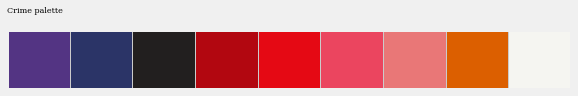

In [ ]:
# Palette
palet = sns.palplot(['#533483','#2B3467','#221f1f', '#b20710', '#e50914','#EB455F','#E97777','#DC5F00','#f5f5f1'])

plt.title("Crime palette ",loc='left',fontfamily='serif',fontsize=8,y=1.2)
plt.show()

1. Apa kategori utama kejahatan yang paling banyak terjadi di London?

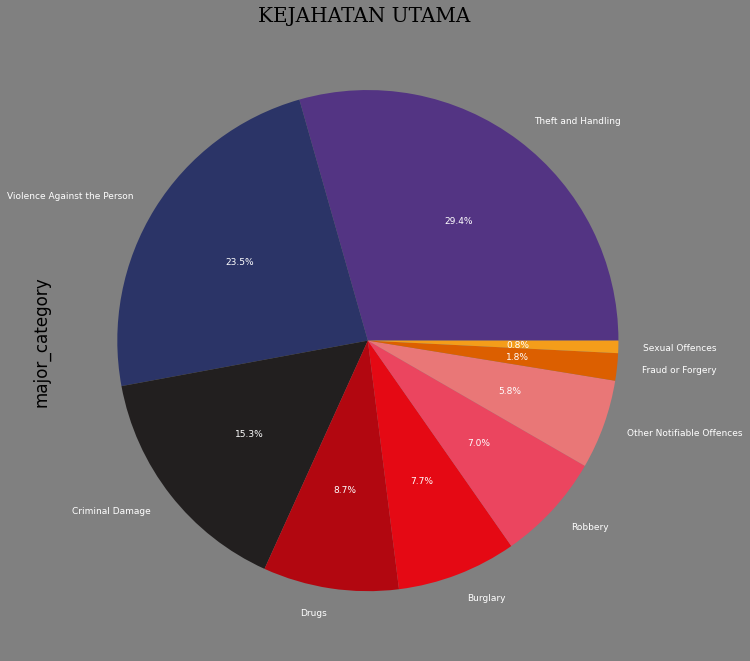

In [ ]:
fig = plt.figure()
fig.patch.set_facecolor('grey')
 
palet =(['#533483','#2B3467','#221f1f', '#b20710', '#e50914','#EB455F','#E97777','#DC5F00','#F49D1A'])
df['major_category'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,20),fontsize=9,colors=palet, textprops={'color':"w"})
plt.title("KEJAHATAN UTAMA ",loc='center',fontfamily='serif',fontsize=20,y=1)
plt.show()

-  Kejahatan utama paling banyak terjadi adalah kategori theft dan handling

2. Wilayah apa yang paling banyak terjadi kasus kejahatan?

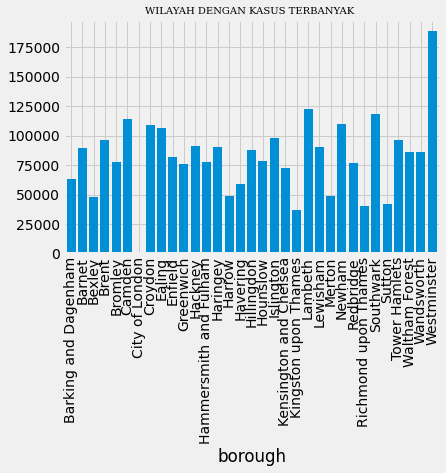

In [ ]:
wilayah = df.groupby(['borough'])['value'].sum()
wilayah.plot.bar(x='borough', y='value',width = 0.8)
plt.xticks(rotation=90)
plt.title("WILAYAH DENGAN KASUS TERBANYAK ",loc='center',fontfamily='serif',fontsize=10,y=1)
plt.show()

- Diagram menunjukan westminster merupakan wilayah dengan kasus kejahatan terbanyak

3. Berapa total kasus berdasarkan tahun?

Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Total kasus taip tahun:
[300303 309628 308960 298999 305051 288762 285449 301401 310551]


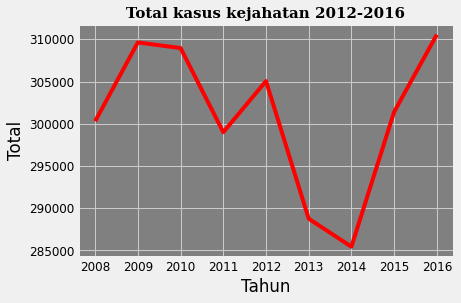

In [ ]:
Year=df['year'].unique()
sumsandyear=df.groupby('year').sum()
sums=sumsandyear['value'].to_numpy()

n = len(Year)

for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
 
print("Years:  ")
print(Year)
print("Total kasus taip tahun:")
print(sums)

pos1 = np.arange(len(Year))
font2 = {'family': 'serif',
        'color':  'Black',
        'weight': 'bold',
        'size': 15,
        }


plt.xticks(pos1,Year)
plt.plot(sums,color='red')
plt.xticks(pos1,Year)
plt.title("Total kasus kejahatan 2012-2016",fontdict=font2)
plt.xlabel('Tahun',color='black')
plt.ylabel("Total",color='black')
plt.xticks(rotation=-0 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(color='black')
plt.yticks(color='black')
ax = plt.axes()
ax.set_facecolor("grey")

plt.show()

- Total kasus pada tertinggi adalah di tahun 2009 dan 2016, namun pada tahun 2014 total kasus mengalami penurunan drastis

4. Apa jenis kejahatan utama yang mengalami kenaikan setiap tahunnya?

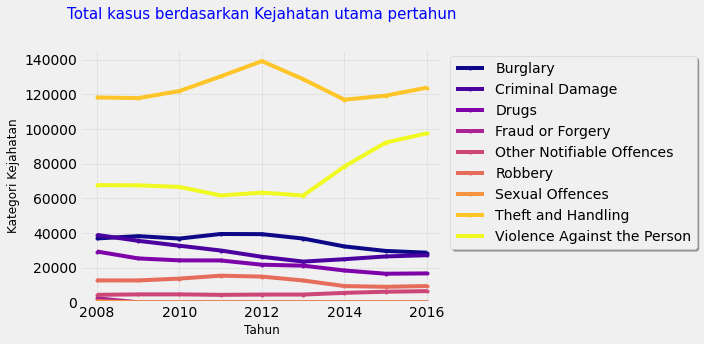

In [ ]:
df.groupby(['year','major_category'])['value'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Total kasus berdasarkan Kejahatan utama pertahun',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Tahun', fontsize = 12)
plt.ylabel('Total',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper lower', bbox_to_anchor=(1, 1), shadow=True, ncol=1)

plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

- Kejahatan Violence Against the person mengalami kenaikan yang cukup signifikan dari tahun 2012-2016

5. Bagaimana total kasus kejahatan setiap bulannya?

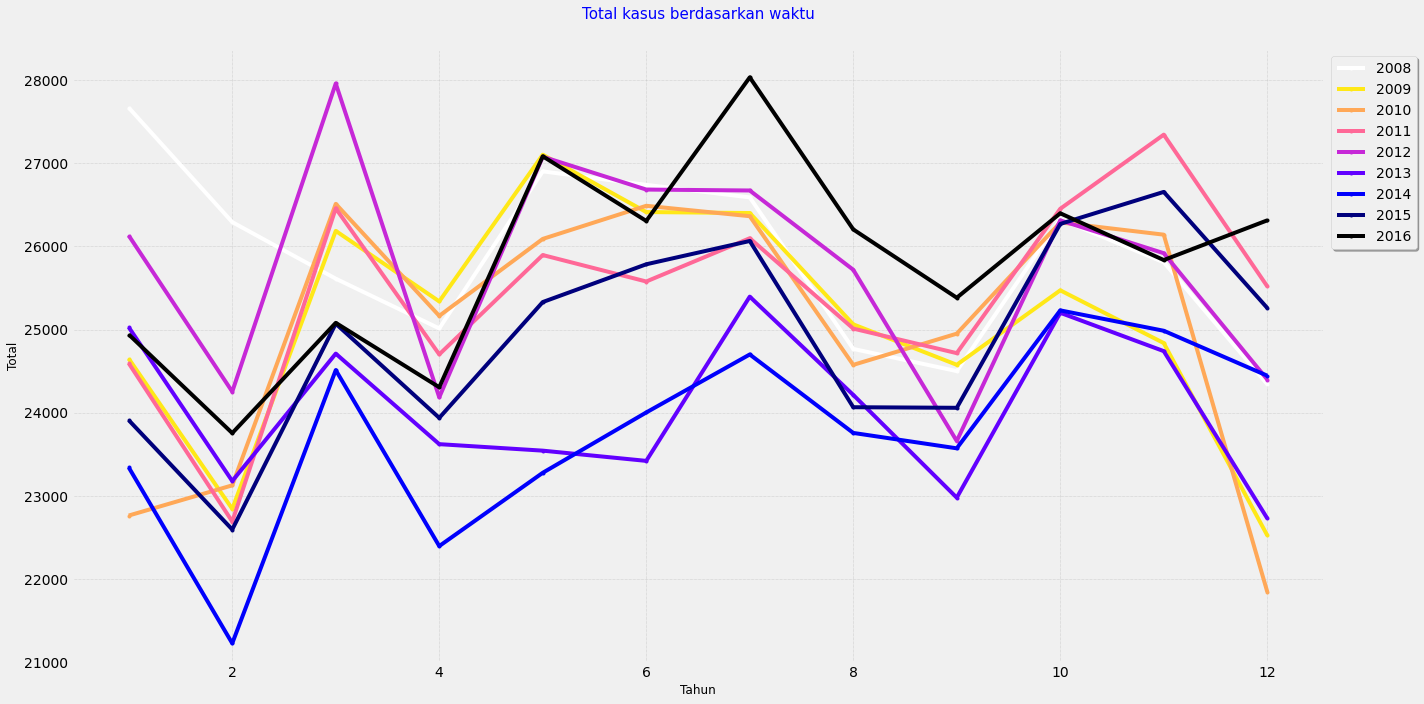

In [ ]:
df.groupby(['month','year'])['value'].sum().unstack().plot(marker='.', cmap='gnuplot2_r')
plt.title('Total kasus berdasarkan waktu',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Bulan', fontsize = 12)
plt.ylabel('Total',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=21000)
plt.legend(loc='upper lower', bbox_to_anchor=(1, 1), shadow=True, ncol=1)

plt.gcf().set_size_inches(20,10)
plt.tight_layout()

- Di awal tahun, jumlah kejahatan turun di bulan Februari, naik ke titik yang relatif tinggi di bulan Maret dan kemudian turun lagi di bulan April. Setelah itu tren mengalami pasang surut dengan dua titik terendah di bulan September dan Desember.

#Kesimpulan

- Theft and Handlingpaling adalah kasus yang paling banyak terjadi di London.

- Jumlah kasus Violence Against the Person meningkat dalam beberapa tahun terakhir.

- Pelaku kejahatan berniat untuk melakukan lebih banyak kejahatan di bulan Maret atau Oktober dan melakukan lebih sedikit kejahatan di bulan Februari, April dan September.